In [1]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer,mean_squared_error
from sklearn.metrics import roc_curve, mean_squared_error, homogeneity_score
from sklearn.metrics import cohen_kappa_score

In [3]:
from google.colab import files
uploaded = files.upload()
forensics = pd.read_csv(io.BytesIO(uploaded['VMResourceUtilizationSlope.csv']))



KeyboardInterrupt: ignored

In [ ]:
forensics.head()

In [ ]:
forensics.count()

LAST_POLL                   9610
VMID                        9610
UUID                        9610
dom                         9610
rxbytes_slope               9594
rxpackets_slope             9594
rxerrors_slope              9594
rxdrops_slope               9594
txbytes_slope               9594
txpackets_slope             9594
txerrors_slope              9594
txdrops_slope               9594
timecpu_slope               9594
timesys_slope               9594
timeusr_slope               9594
state_slope                 9594
memmax_slope                9594
mem_slope                   9594
cpus_slope                  9594
cputime_slope               9594
memactual_slope             9594
memswap_in_slope            9594
memswap_out_slope           9594
memmajor_fault_slope        9594
memminor_fault_slope        9594
memunused_slope             9594
memavailable_slope          9594
memusable_slope             9594
memlast_update_slope        9594
memdisk_cache_slope         9594
memhugetlb

In [ ]:
forensics.isnull().sum()

LAST_POLL                    0
VMID                         0
UUID                         0
dom                          0
rxbytes_slope               16
rxpackets_slope             16
rxerrors_slope              16
rxdrops_slope               16
txbytes_slope               16
txpackets_slope             16
txerrors_slope              16
txdrops_slope               16
timecpu_slope               16
timesys_slope               16
timeusr_slope               16
state_slope                 16
memmax_slope                16
mem_slope                   16
cpus_slope                  16
cputime_slope               16
memactual_slope             16
memswap_in_slope            16
memswap_out_slope           16
memmajor_fault_slope        16
memminor_fault_slope        16
memunused_slope             16
memavailable_slope          16
memusable_slope             16
memlast_update_slope        16
memdisk_cache_slope         16
memhugetlb_pgalloc_slope    16
memhugetlb_pgfail_slope     16
memrss_s

In [ ]:
forensics = forensics.dropna()

In [ ]:
forensics.describe()

,LAST_POLL,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
count,9.594000e+03,9594.000000,9594.000000,9594.000000,9594.0,9594.0,9594.000000,9594.000000,9594.0,9594.0,...,9594.000000,9594.000000,9594.000000,9594.000000,9594.0,9594.000000,9594.000000,9594.0,9594.0,9594.0
mean,1.604482e+09,7.551178,88.237795,35.454518,0.0,0.0,31.755948,22.272845,0.0,0.0,...,0.869522,2.360632,31.607359,80.303610,0.0,0.024526,0.056261,0.0,0.0,0.0
std,8.162846e+04,1.731400,0.779002,18.590801,0.0,0.0,41.176777,36.895174,0.0,0.0,...,7.763400,14.373804,27.642737,27.866019,0.0,1.105076,2.249146,0.0,0.0,0.0
min,1.604406e+09,1.000000,58.392500,1.789900,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,1.604424e+09,6.000000,87.797400,26.565100,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,11.309900,89.963100,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,1.604442e+09,8.000000,87.954600,28.072500,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,18.434900,89.983900,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.604589e+09,9.000000,88.264300,30.963800,0.0,0.0,81.275200,23.782000,0.0,0.0,...,0.000000,0.000000,62.650100,89.995100,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1.604636e+09,10.000000,89.999900,89.915700,0.0,0.0,90.000000,89.998200,0.0,0.0,...,89.593000,90.000000,89.083800,90.000000,0.0,64.840700,89.992100,0.0,0.0,0.0


In [ ]:
#forensics['Status']=forensics['Status'].replace(['Normal','Attack'],[0,1])

In [ ]:
forensics.head()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
forensics['Status'].value_counts()

0    7288
1    2306
Name: Status, dtype: int64

In [ ]:
colors =['#069AF3','#FF4500','#3f88c5','#ffba08','#d00000']
fig = go.Figure(go.Pie(labels=['Normal','Attack'],values=forensics.Status.value_counts(),name='Attack'))
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16,marker={'colors':colors})
fig.update_layout(height=400, width=400, title_text='<b style="color:#000000;">Percentage of Target Variable</b>')
fig.show()

In [ ]:
df = forensics.drop(['LAST_POLL', 'VMID', 'UUID','dom'], axis=1)

In [ ]:
df.corr()

,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
rxbytes_slope,1.000000,0.891586,NaN,NaN,0.578981,0.583399,NaN,NaN,-0.144068,-0.025594,...,0.069281,-0.084335,-0.207916,NaN,0.005258,-0.000407,NaN,NaN,NaN,0.578740
rxpackets_slope,0.891586,1.000000,NaN,NaN,0.576056,0.643415,NaN,NaN,-0.187989,-0.069083,...,0.056020,-0.132336,-0.252219,NaN,0.004506,-0.000433,NaN,NaN,NaN,0.648451
rxerrors_slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rxdrops_slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txbytes_slope,0.578981,0.576056,NaN,NaN,1.000000,0.718074,NaN,NaN,-0.090669,0.321457,...,0.042840,-0.142722,-0.341960,NaN,-0.017118,-0.019293,NaN,NaN,NaN,0.669029
txpackets_slope,0.583399,0.643415,NaN,NaN,0.718074,1.000000,NaN,NaN,-0.129637,0.494008,...,0.000598,-0.280390,-0.543437,NaN,-0.013400,-0.015102,NaN,NaN,NaN,0.982704
txerrors_slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txdrops_slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timecpu_slope,-0.144068,-0.187989,NaN,NaN,-0.090669,-0.129637,NaN,NaN,1.000000,0.007230,...,0.049312,0.227789,0.099803,NaN,0.004550,0.010084,NaN,NaN,NaN,-0.152591
timesys_slope,-0.025594,-0.069083,NaN,NaN,0.321457,0.494008,NaN,NaN,0.007230,1.000000,...,-0.034306,-0.163256,-0.321277,NaN,0.000534,-0.000919,NaN,NaN,NaN,0.478070


Text(0.5, 1.0, 'Feature Correlation Heatmap')

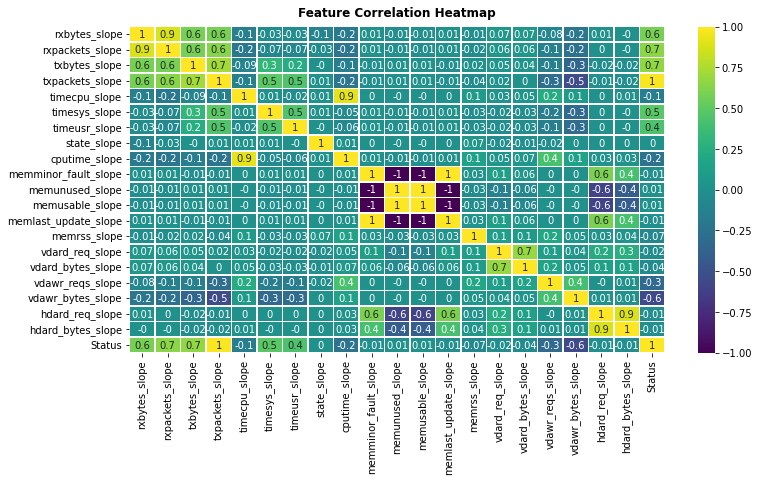

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(round(df.drop(['rxerrors_slope', 'rxdrops_slope', 'txerrors_slope', 'txdrops_slope', 'memmax_slope',
                     'mem_slope','cpus_slope','memactual_slope','memswap_in_slope', 'memswap_out_slope',
                     'memmajor_fault_slope', 'memavailable_slope', 'memdisk_cache_slope','memhugetlb_pgalloc_slope',
                     'memhugetlb_pgfail_slope', 'vdaerror_slope', 'hdawr_reqs_slope', 'hdawr_bytes_slope','hdaerror_slope' 
                     ] , axis=1).corr(), 2), linewidth=0.5,annot=True,fmt='.1g', cmap="viridis")
plt.title("Feature Correlation Heatmap", fontsize = 12, pad =10, fontweight='bold')

In [ ]:
X = df.drop(['Status'], axis=1)

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
y = df['Status']
class_le = LabelEncoder()
y = class_le.fit_transform(y)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# K-means for EDA 

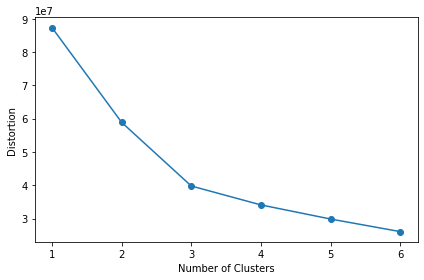

In [ ]:
# Elbow method to find the optimal value of K
distortions = []
for i in range(1,7):
    km = KMeans(n_clusters=i,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=0)
    km.fit_predict(X)
    distortions.append(km.inertia_)
plt.plot(range(1,7), distortions, marker ='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
km = KMeans(n_clusters=2,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=1)
y_km = km.fit_predict(scaled_X)

In [ ]:
y_km

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

In [ ]:
homogeneity_score(y, y_km)

0.8661393463406996

In [ ]:
#train test split
X_train, X_test,y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state =1)

In [ ]:
#Naive Bayes without Balancing
bnb=BernoulliNB(class_prior=[0.5,0.5], alpha=1 )
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1, class_prior=[0.5, 0.5])

In [ ]:
y_pred_nb = bnb.predict(X_test)

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred_nb))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2191
           1       0.90      0.98      0.94       688

    accuracy                           0.97      2879
   macro avg       0.95      0.97      0.96      2879
weighted avg       0.97      0.97      0.97      2879



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



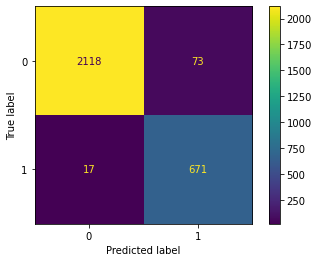

In [ ]:
plot_confusion_matrix(bnb,X_test,y_test)
plt.show()

In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test, y_pred_nb))
print('Precision : %3f' % precision_score(y_test, y_pred_nb))
print('Recall : %3f' % recall_score(y_test, y_pred_nb))
print('F1 : %3f' % f1_score(y_test, y_pred_nb))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_nb))

Accuracy : 0.968739
Precision : 0.901882
Recall : 0.975291
F1 : 0.937151
kappa_statistic : 0.916389


In [ ]:
#Support Vector Machine
svc = SVC(class_weight='balanced')

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 'scale'}

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2191
           1       0.99      1.00      0.99       688

    accuracy                           1.00      2879
   macro avg       0.99      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



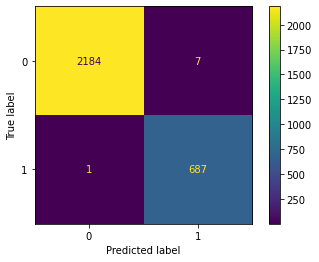

In [ ]:
plot_confusion_matrix(grid,X_test,y_test)

In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test, grid_pred))
print('Precision : %3f' % precision_score(y_test, grid_pred))
print('Recall : %3f' % recall_score(y_test, grid_pred))
print('F1 : %3f' % f1_score(y_test, grid_pred))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, grid_pred))

Accuracy : 0.997221
Precision : 0.989914
Recall : 0.998547
F1 : 0.994211
kappa_statistic : 0.992383


In [ ]:
#Decision Tree Model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_dt = dtmodel.predict(X_test)

[Text(0.5, 0.9, 'X[5] <= 1.22\ngini = 0.366\nsamples = 6715\nvalue = [5097, 1618]'),
 Text(0.25, 0.7, 'X[28] <= 1.871\ngini = 0.0\nsamples = 5071\nvalue = [5070, 1]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 4640\nvalue = [4640, 0]'),
 Text(0.375, 0.5, 'X[28] <= 1.895\ngini = 0.005\nsamples = 431\nvalue = [430, 1]'),
 Text(0.25, 0.3, 'X[31] <= 0.129\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 426\nvalue = [426, 0]'),
 Text(0.75, 0.7, 'X[0] <= 2.243\ngini = 0.032\nsamples = 1644\nvalue = [27, 1617]'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 1617\nvalue = [0, 1617]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]')]

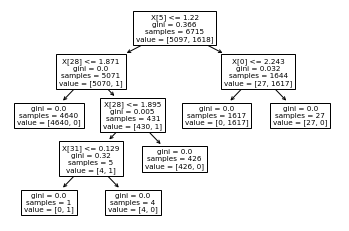

In [ ]:
tree.plot_tree(dtmodel)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_dt)
c_report = classification_report(y_pred_dt, y_test)
c_matrix = confusion_matrix(y_test, y_pred_dt)

In [ ]:
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9986106286905175
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2193
           1       1.00      1.00      1.00       686

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Confusion matrix:
[[2190    1]
 [   3  685]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



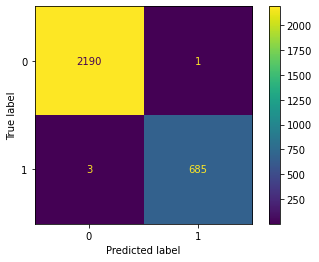

In [ ]:
plot_confusion_matrix(dtmodel,X_test,y_test)

In [ ]:
#Random Oversampling of Data

In [ ]:
count_class_0,count_class_1=forensics.Status.value_counts()
df_class_0=forensics[forensics['Status']=="Normal"]
df_class_1=forensics[forensics['Status']=="Attack"]

In [ ]:
df_class_1_over=df_class_1.sample(count_class_0, replace=True)
df_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [ ]:
print("Random Over Sampling: ")
print(df_over.Status.value_counts())

Random Over Sampling: 
Normal    7288
Attack    7288
Name: Status, dtype: int64


In [ ]:
colors =['#069AF3','#FF4500','#3f88c5','#ffba08','#d00000']
fig = go.Figure(go.Pie(labels=['Normal','Attack'],values=df_over.Status.value_counts(),name='Attack'))
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16,marker={'colors':colors})
fig.update_layout(height=400, width=400, title_text='<b style="color:#000000;">Percentage of Target Variable</b>')
fig.show()

In [ ]:
df_over=df_over.drop(['LAST_POLL', 'VMID', 'UUID','dom'], axis=1)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

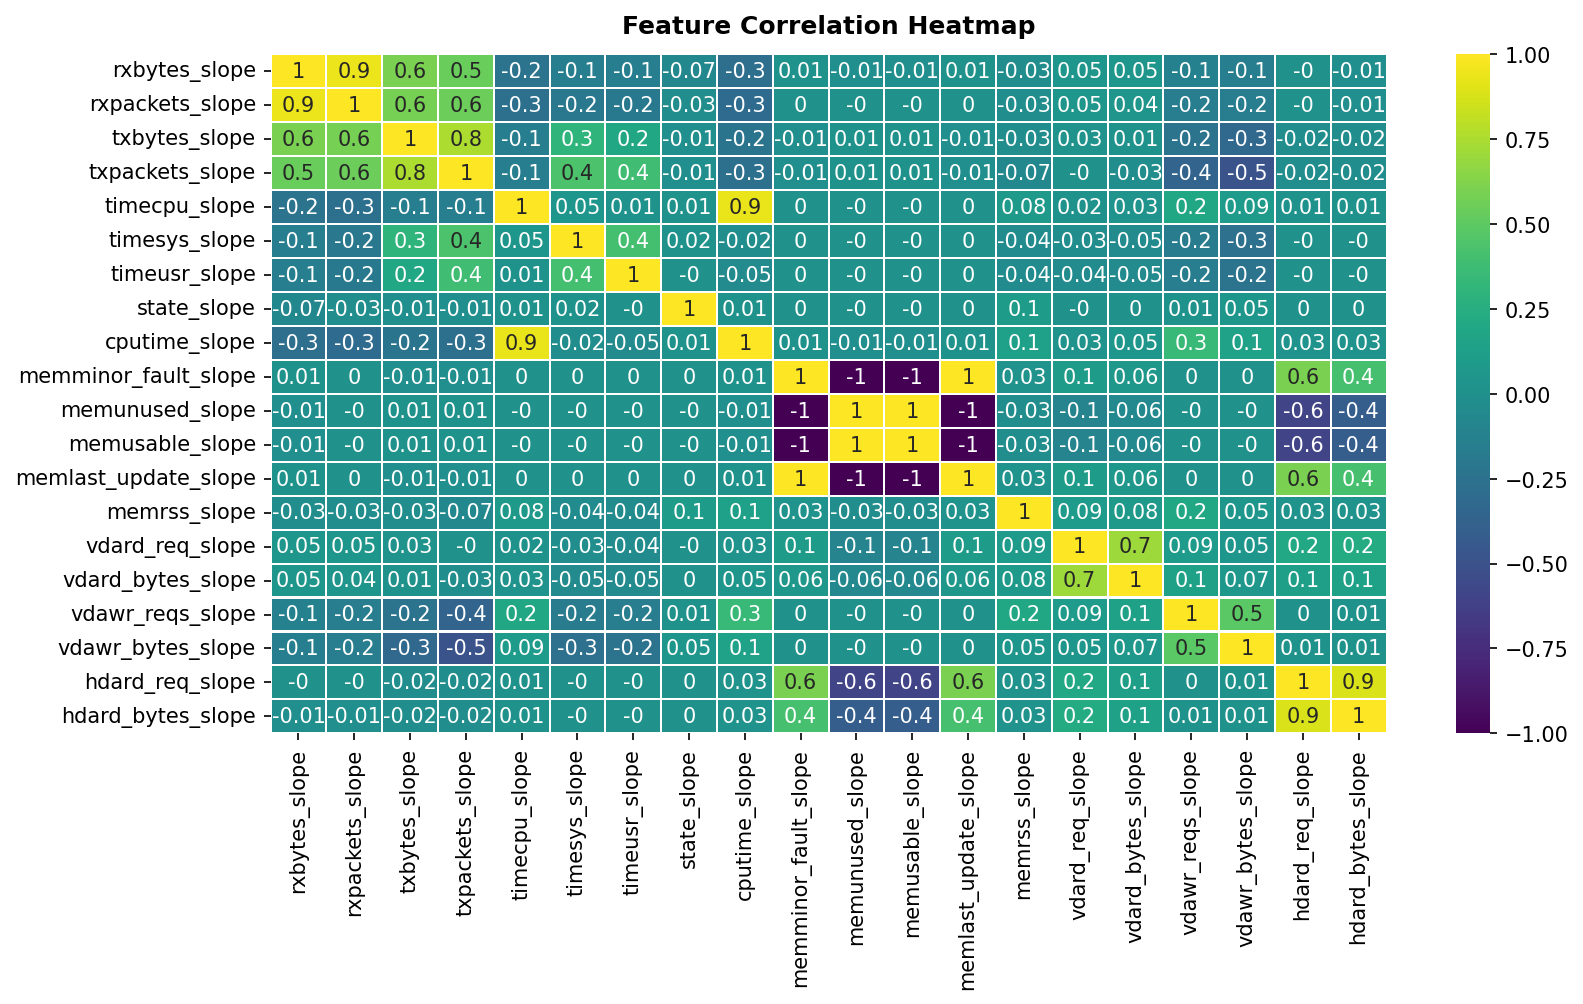

In [ ]:
plt.figure(figsize=(12,6), dpi = 150)
sns.heatmap(round(df_over.drop(['rxerrors_slope', 'rxdrops_slope', 'txerrors_slope', 'txdrops_slope', 'memmax_slope',
                     'mem_slope','cpus_slope','memactual_slope','memswap_in_slope', 'memswap_out_slope',
                     'memmajor_fault_slope', 'memavailable_slope', 'memdisk_cache_slope','memhugetlb_pgalloc_slope',
                     'memhugetlb_pgfail_slope', 'vdaerror_slope', 'hdawr_reqs_slope', 'hdawr_bytes_slope','hdaerror_slope' 
                     ] , axis=1).corr(), 2), linewidth=0.5,annot=True,fmt='.1g', cmap="viridis")
plt.title("Feature Correlation Heatmap", fontsize = 12, pad =10, fontweight='bold')

In [ ]:
#Splitting the Data
X_oversampled = df_over.drop(['Status'], axis=1)
scaled_X_over = scaler.fit_transform(X_oversampled)


In [ ]:
y_oversampled = df_over['Status']
y_oversampled = class_le.fit_transform(y_oversampled)

In [ ]:
#train test split
X_train_over, X_test_over,y_train_over, y_test_over = train_test_split(scaled_X_over, y_oversampled, test_size=0.3, random_state =1)

In [ ]:
#Decision Tree on Oversampled Data

dtmodel_over = DecisionTreeClassifier().fit(X_train_over,y_train_over)
y_pred_over_dt = dtmodel.predict(X_test_over)

[Text(0.6, 0.9166666666666666, 'X[5] <= -0.152\ngini = 0.5\nsamples = 10203\nvalue = [5116, 5087]'),
 Text(0.3333333333333333, 0.75, 'X[10] <= -0.309\ngini = 0.002\nsamples = 5089\nvalue = [5085, 4]'),
 Text(0.13333333333333333, 0.5833333333333334, 'X[28] <= 2.044\ngini = 0.001\nsamples = 5068\nvalue = [5066, 2]'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 4644\nvalue = [4644, 0]'),
 Text(0.2, 0.4166666666666667, 'X[28] <= 2.07\ngini = 0.009\nsamples = 424\nvalue = [422, 2]'),
 Text(0.13333333333333333, 0.25, 'X[15] <= 0.355\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.06666666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.26666666666666666, 0.25, 'gini = 0.0\nsamples = 418\nvalue = [418, 0]'),
 Text(0.5333333333333333, 0.5833333333333334, 'X[28] <= -2.643\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.4666666666666667, 0.4166666

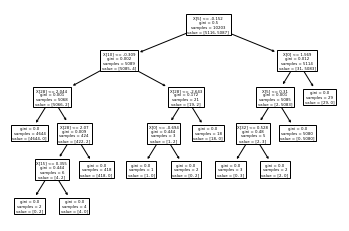

In [ ]:
tree.plot_tree(dtmodel_over)

In [ ]:
accuracy = accuracy_score(y_test_over,y_pred_over_dt)
c_report = classification_report(y_pred_over_dt, y_test_over)
c_matrix = confusion_matrix(y_test_over, y_pred_over_dt)

In [ ]:
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.49759890235536247
              precision    recall  f1-score   support

           0       1.00      0.50      0.66      4369
           1       0.00      1.00      0.00         4

    accuracy                           0.50      4373
   macro avg       0.50      0.75      0.33      4373
weighted avg       1.00      0.50      0.66      4373

Confusion matrix:
[[2172    0]
 [2197    4]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



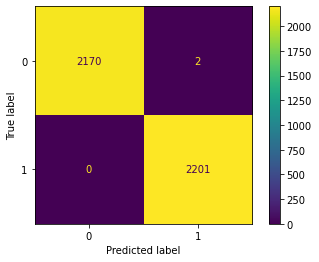

In [ ]:
plot_confusion_matrix(dtmodel_over,X_test_over,y_test_over)

In [ ]:
#Naive Bayes after Balancing
bnb=BernoulliNB(class_prior=[0.5,0.5], alpha=1 )
bnb.fit(X_train_over, y_train_over)

NameError: ignored

In [ ]:
# Poojitha


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler() #std=1 and mean=0
scaler.fit(forensics)

NameError: ignored

In [ ]:
scaled_data = scaler.transform(forensics)

NameError: ignored

In [ ]:
scaled_data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscaler = StandardScaler() #std=1 and mean=0
mmscaler.fit(forensics)

In [ ]:
mmscaled_data = scaler.transform(forensics)
mmscaled_data

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
pca.fit(scaled_data)

In [ ]:
pca_data = pca.transform(scaled_data)

In [ ]:
X = data1.iloc[:, :-1].values
y = data1.iloc[:, 20].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
error = []
# Calculating the error rate for K-values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), error, color='red', marker='o',
        markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

In [ ]:
# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

In [ ]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

In [ ]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

In [ ]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

In [ ]:
# Building the two lists for visualization
models = ['Ridge Regression', 'Lasso Regression']
scores = [ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

In [ ]:
X = pca_data
y = data1.iloc[:, 20].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dtmodel = RandomForestClassifier().fit(X_train,y_train)
print(dtmodel)
y_pred_rf = dtmodel.predict(X_test)
y_pred_rf

NameError: ignored

# Xgboost

In [ ]:
import pandas as pd

X_train_xgb = pd.DataFrame(X_train, columns = X.columns)
X_test_xgb = pd.DataFrame(X_test, columns = X.columns)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


xgb_cl = xgb.XGBClassifier()

# Init classifier

# Fit
xgb_cl = xgb_cl.fit(X_train_xgb, y_train)

# Predict
xgb_preds = xgb_cl.predict(X_test_xgb)

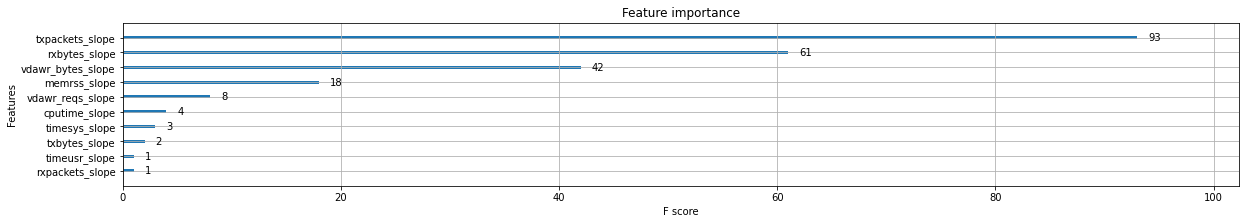

<Figure size 720x360 with 0 Axes>

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_cl)
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xgb_preds)

array([[ 685,    3],
       [   0, 2191]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


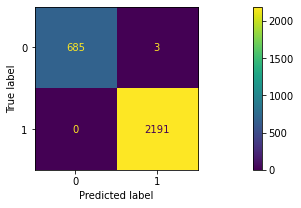

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb_cl,X_test_xgb,y_test)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train_xgb, y_train)

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
print('Classification Report')
print(classification_report(y_test, xgb_preds, digits=4))

Classification Report
              precision    recall  f1-score   support

           0     1.0000    0.9956    0.9978       688
           1     0.9986    1.0000    0.9993      2191

    accuracy                         0.9990      2879
   macro avg     0.9993    0.9978    0.9986      2879
weighted avg     0.9990    0.9990    0.9990      2879



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds_LR = clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
print('Classification Report')
print(classification_report(y_test, preds_LR, digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9956    0.9971    0.9964       688
           1     0.9991    0.9986    0.9989      2191

    accuracy                         0.9983      2879
   macro avg     0.9974    0.9979    0.9976      2879
weighted avg     0.9983    0.9983    0.9983      2879



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


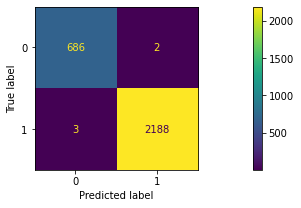

In [ ]:
plot_confusion_matrix(clf,X_test,y_test)
plt.show()